In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,6
sns.set_style("darkgrid")
sns.set_palette('magma_r')

In [2]:
dataset = pd.read_csv("~/Downloads/BRCA.csv")
print(dataset)

       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0    TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1    TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2    TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3    TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4    TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   
..            ...   ...     ...       ...       ...       ...       ...   
336           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
337           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
338           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
339           NaN   NaN     NaN       NaN       NaN       NaN       NaN   
340           NaN   NaN     NaN       NaN       NaN       NaN       NaN   

    Tumour_Stage                      Histology ER status PR status  \
0            III  Infiltrati

In [3]:
dataset.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
dataset.isnull().any()

Patient_ID            True
Age                   True
Gender                True
Protein1              True
Protein2              True
Protein3              True
Protein4              True
Tumour_Stage          True
Histology             True
ER status             True
PR status             True
HER2 status           True
Surgery_type          True
Date_of_Surgery       True
Date_of_Last_Visit    True
Patient_Status        True
dtype: bool

In [5]:
dataset.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
len(dataset)

341

In [7]:
print(dataset.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [8]:
brca = dataset.dropna()
brca.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [9]:
brca.isnull().any()

Patient_ID            False
Age                   False
Gender                False
Protein1              False
Protein2              False
Protein3              False
Protein4              False
Tumour_Stage          False
Histology             False
ER status             False
PR status             False
HER2 status           False
Surgery_type          False
Date_of_Surgery       False
Date_of_Last_Visit    False
Patient_Status        False
dtype: bool

In [10]:
len(brca)

317

# Descriptive Statistics

In [11]:
Age_desc = brca.Age.describe()
Age_desc

count    317.000000
mean      58.725552
std       12.827374
min       29.000000
25%       49.000000
50%       58.000000
75%       67.000000
max       90.000000
Name: Age, dtype: float64

In [12]:
brca.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [13]:
Protein_Expression_Level_1 = brca.Protein1.describe()
Protein_Expression_Level_2 = brca.Protein2.describe()
Protein_Expression_Level_3 = brca.Protein3.describe()
Protein_Expression_Level_4 = brca.Protein4.describe()
Protein_Expression_Level_1, Protein_Expression_Level_2, Protein_Expression_Level_3, Protein_Expression_Level_4

(count    317.000000
 mean      -0.027232
 std        0.543858
 min       -2.144600
 25%       -0.350600
 50%        0.005649
 75%        0.336260
 max        1.593600
 Name: Protein1, dtype: float64,
 count    317.000000
 mean       0.949557
 std        0.906153
 min       -0.978730
 25%        0.368840
 50%        0.997130
 75%        1.612000
 max        3.402200
 Name: Protein2, dtype: float64,
 count    317.000000
 mean      -0.095104
 std        0.589027
 min       -1.627400
 25%       -0.531360
 50%       -0.193040
 75%        0.251210
 max        2.193400
 Name: Protein3, dtype: float64,
 count    317.000000
 mean       0.006713
 std        0.625965
 min       -2.025500
 25%       -0.382240
 50%        0.038522
 75%        0.436250
 max        1.629900
 Name: Protein4, dtype: float64)

In [14]:
brca.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


In [15]:
corr_matrix = brca.corr()
corr_matrix

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


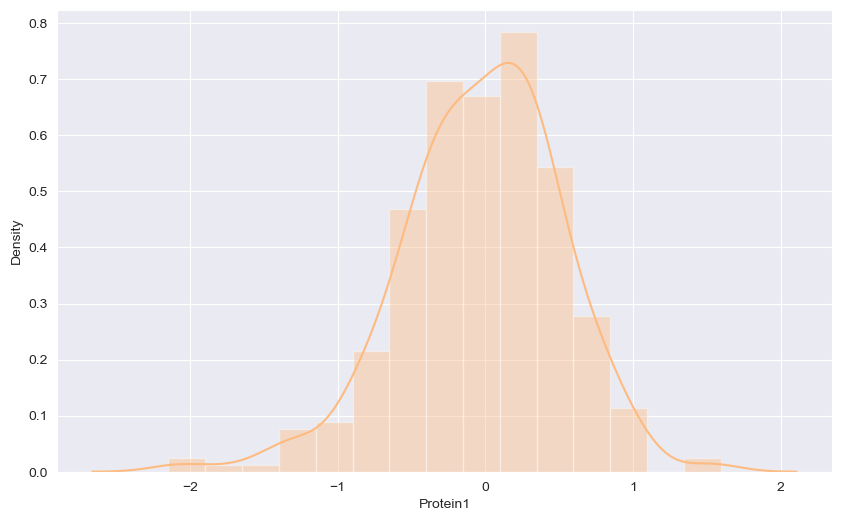

In [16]:
H1=sns.distplot(brca.Protein1, bins=15)

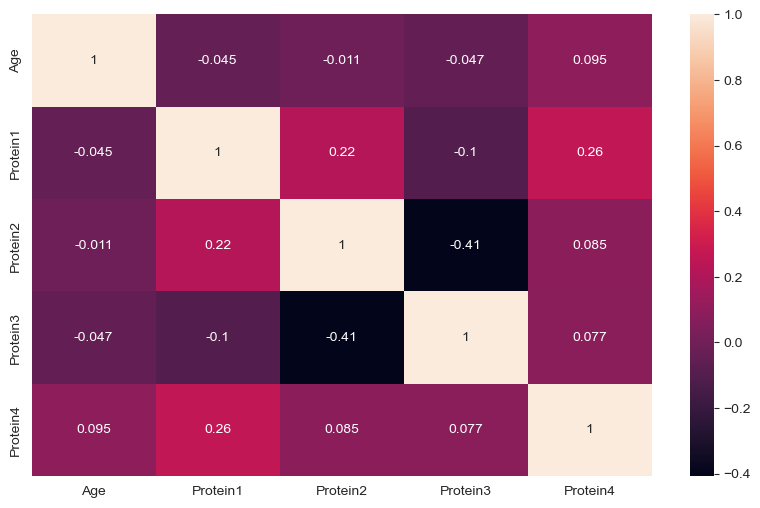

In [17]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

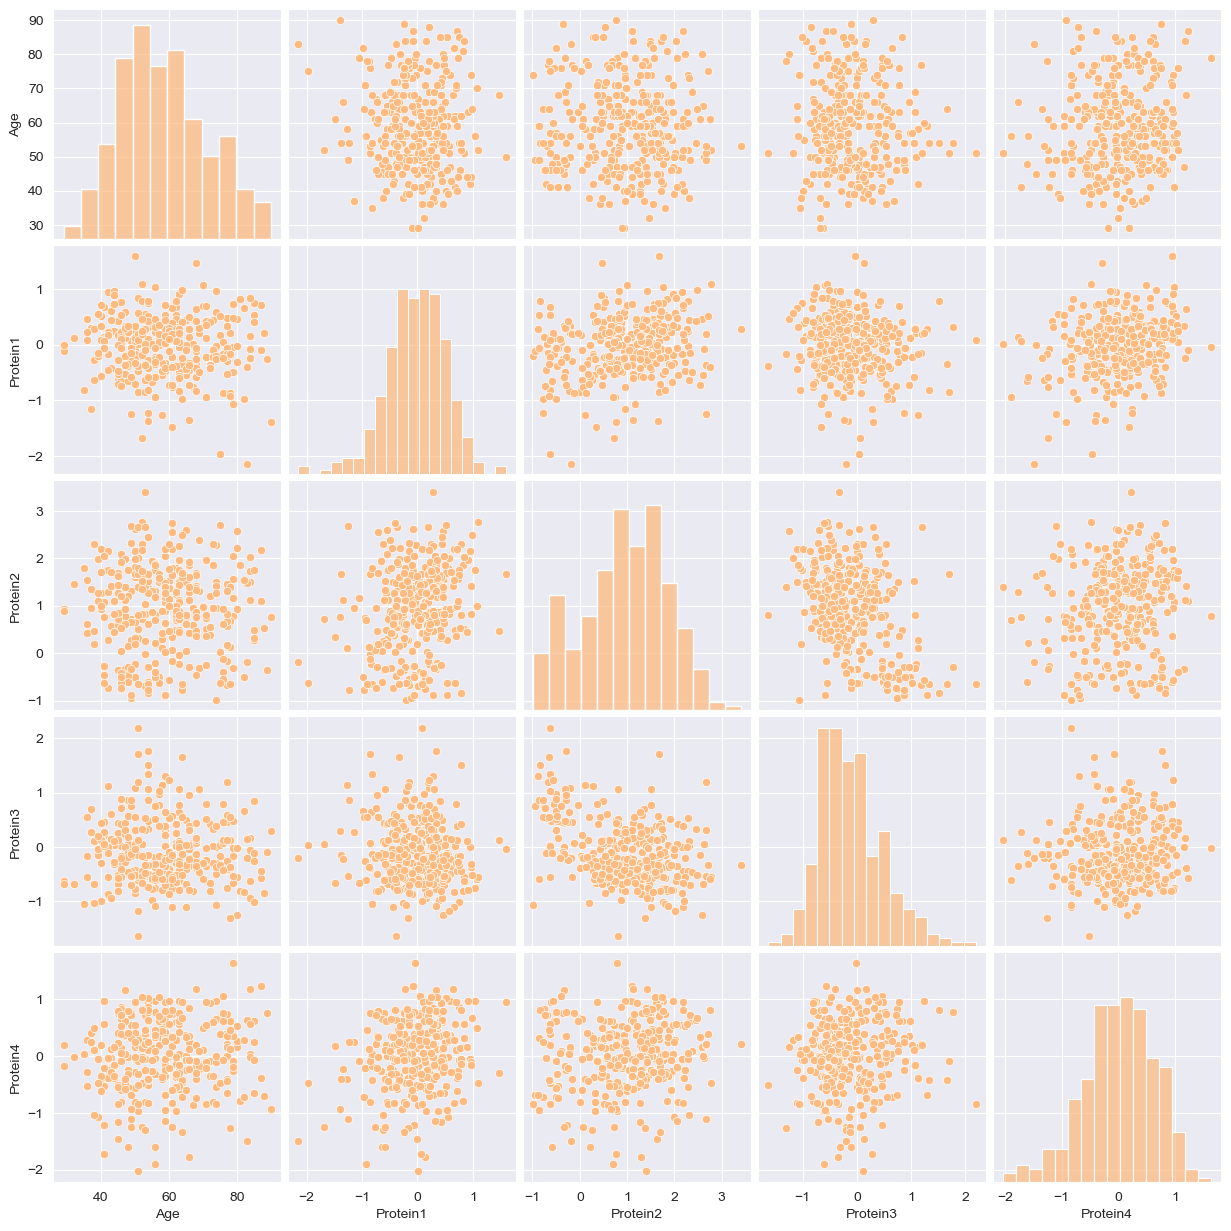

In [18]:
sns.pairplot(brca)

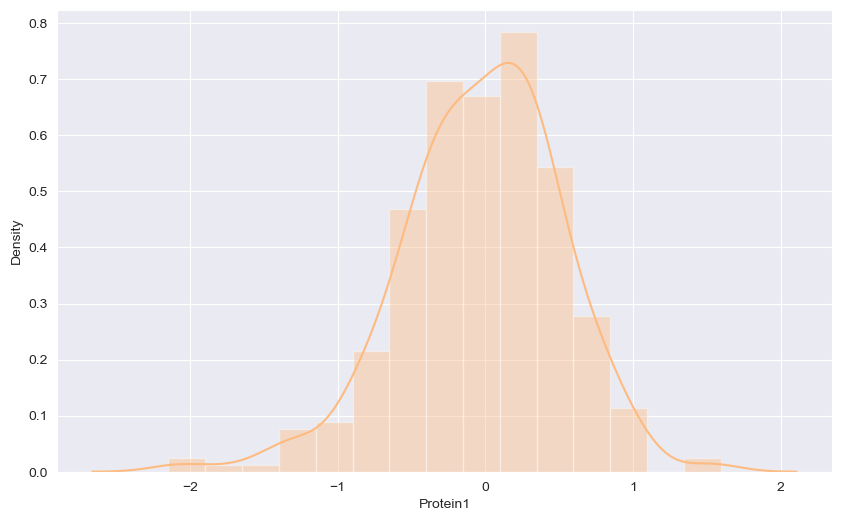

In [19]:
H1=sns.distplot(brca.Protein1, bins=15)

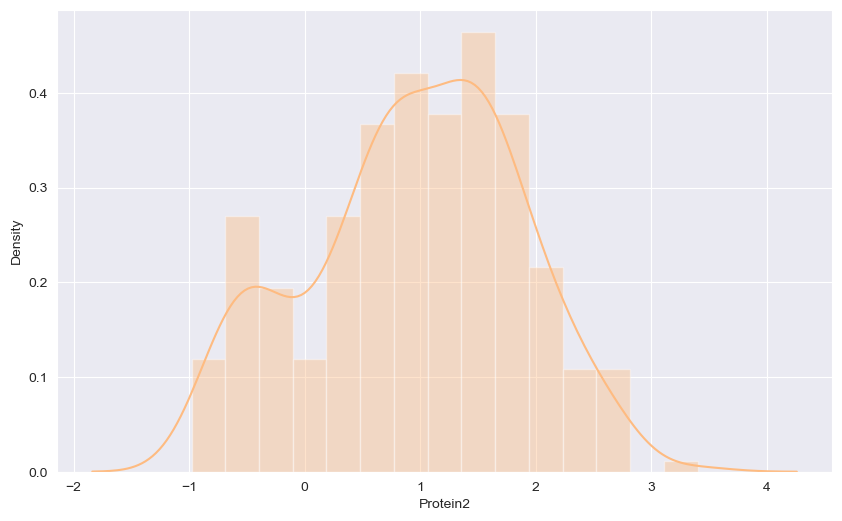

In [20]:
H2=sns.distplot(brca.Protein2, bins=15)

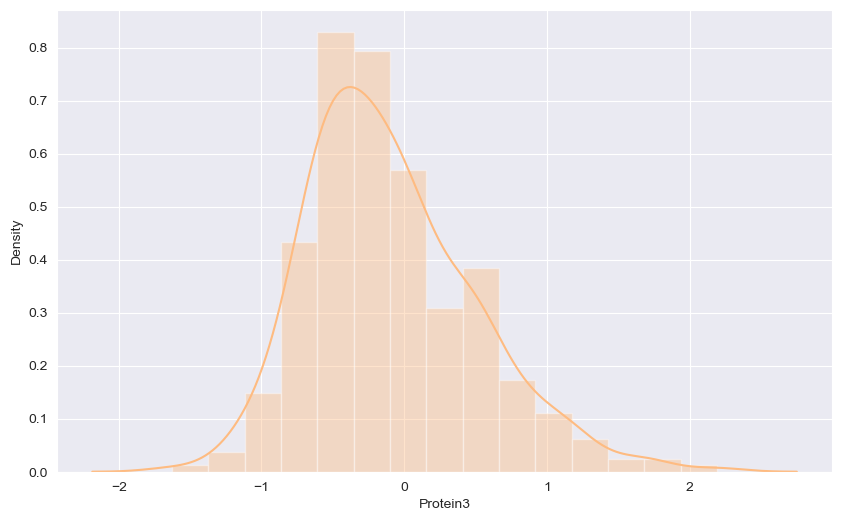

In [21]:
H3=sns.distplot(brca.Protein3, bins=15)

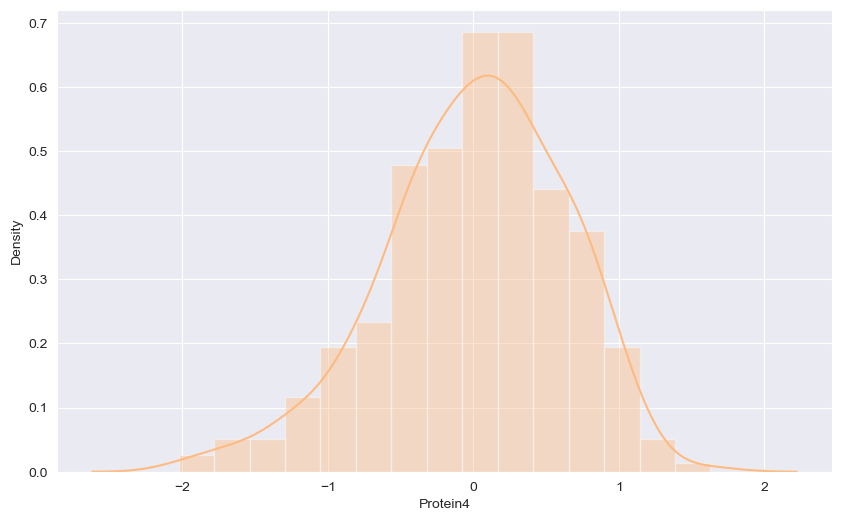

In [22]:
H4=sns.distplot(brca.Protein4, bins=15)

[Text(0, 0, '77'), Text(0, 0, '180'), Text(0, 0, '60')]

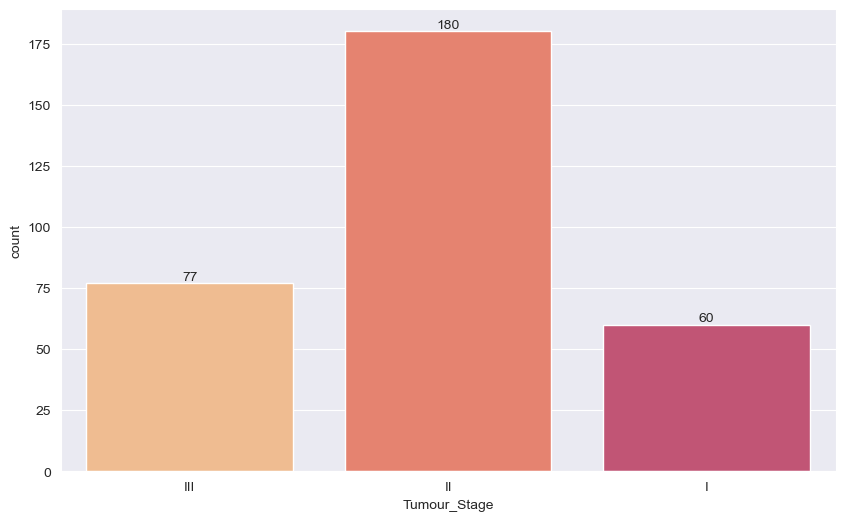

In [23]:
TumourStage = sns.countplot(x = "Tumour_Stage", data = brca)
TumourStage.bar_label(container=TumourStage.containers[0])

[Text(0, 0, '89'), Text(0, 0, '66'), Text(0, 0, '97'), Text(0, 0, '65')]

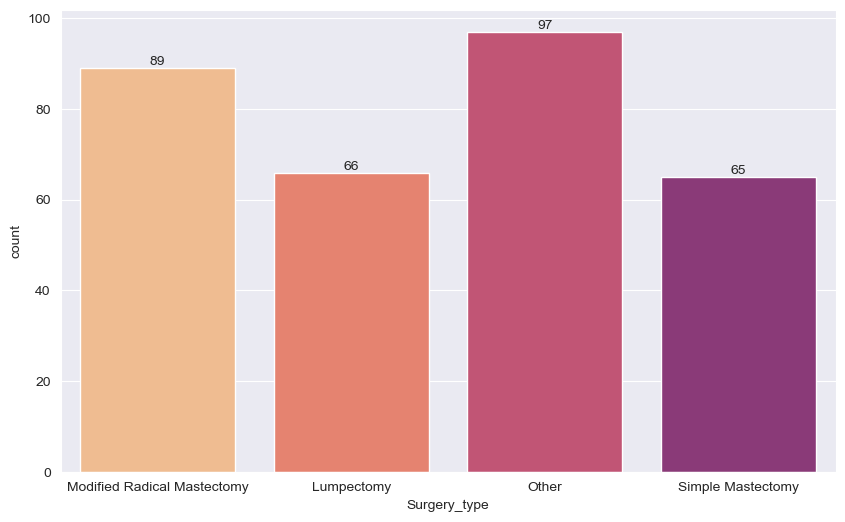

In [24]:
SurgeryType=sns.countplot(x = "Surgery_type", data = brca)
SurgeryType.bar_label(container=SurgeryType.containers[0])

# Visualization

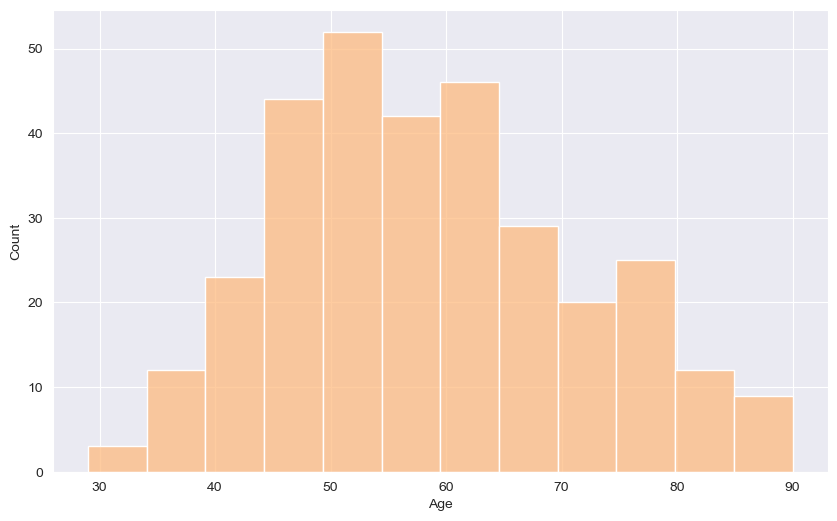

In [25]:
#Histogram of Age at Diagnosis
H_A = sns.histplot(data = brca,  x = "Age")

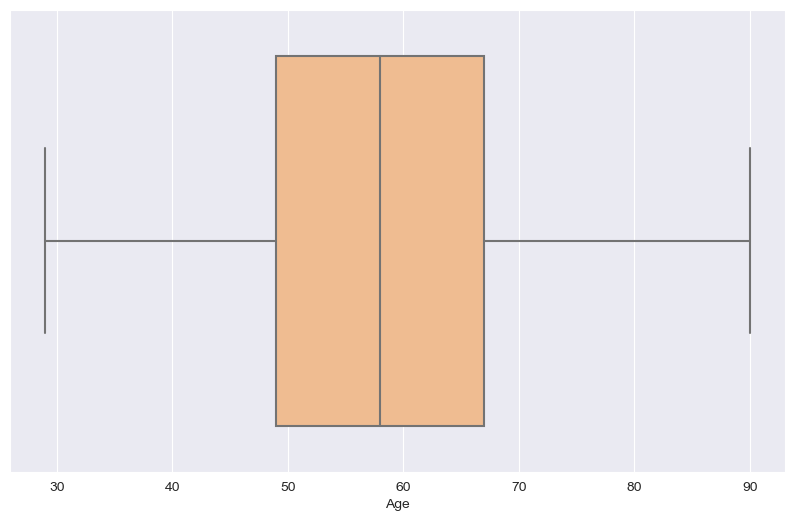

In [26]:
#Box Plot
B_A = sns.boxplot(data = brca, x = "Age")

[Text(0, 0, '313'), Text(0, 0, '4')]

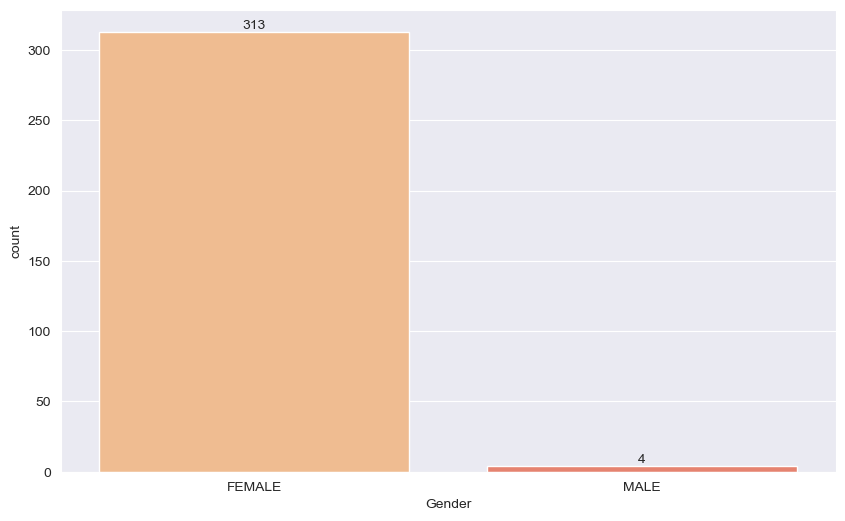

In [27]:
GenderPlot = sns.countplot(x = "Gender", data = brca)
GenderPlot.bar_label(container=GenderPlot.containers[0])

<AxesSubplot:xlabel='Protein4'>

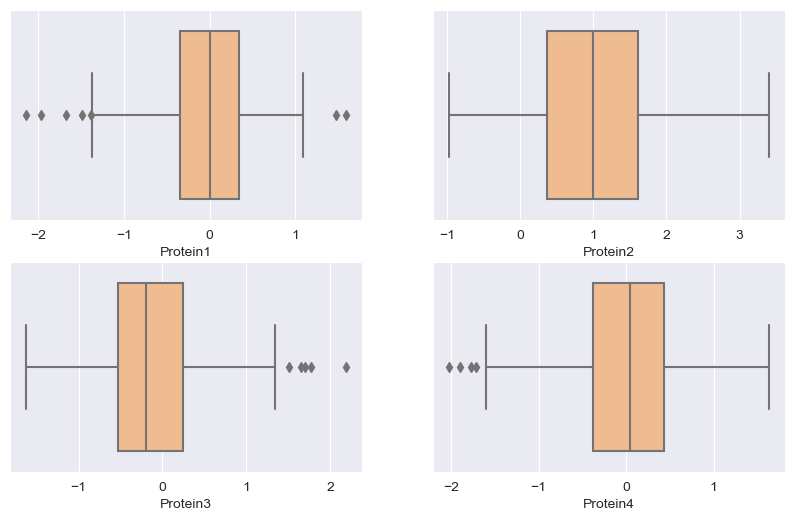

In [28]:
fig, axs = plt.subplots(2,2)
sns.boxplot(ax=axs[0,0], data = brca, x = "Protein1", )
sns.boxplot(ax=axs[0,1], data = brca, x = "Protein2")
sns.boxplot(ax=axs[1,0],data = brca, x = "Protein3")
sns.boxplot(ax=axs[1,1],data = brca, x = "Protein4")

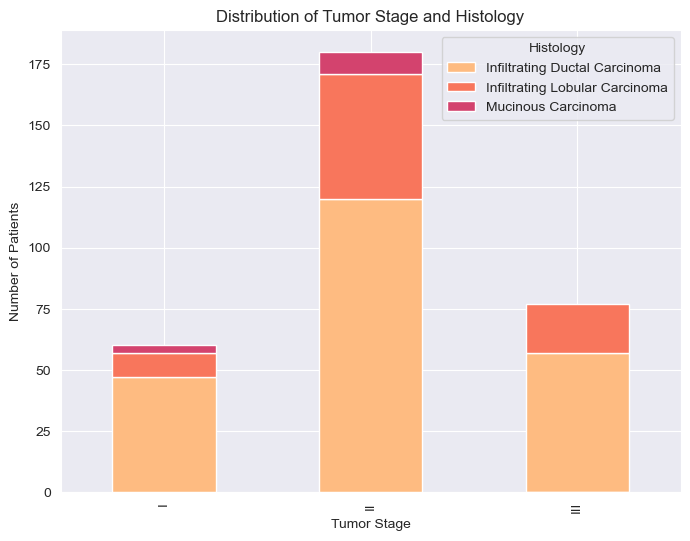

In [29]:
grouped_data = brca.groupby(['Tumour_Stage', 'Histology'])['Patient_ID'].count()

# unstack the data to create a stacked bar chart
unstacked_data = grouped_data.unstack()

# plot the stacked bar chart
ax = unstacked_data.plot(kind='bar', stacked=True, figsize=(8,6))

# set the title and labels for the plot
ax.set_title('Distribution of Tumor Stage and Histology')
ax.set_xlabel('Tumor Stage')
ax.set_ylabel('Number of Patients')

# display the plot
plt.show()

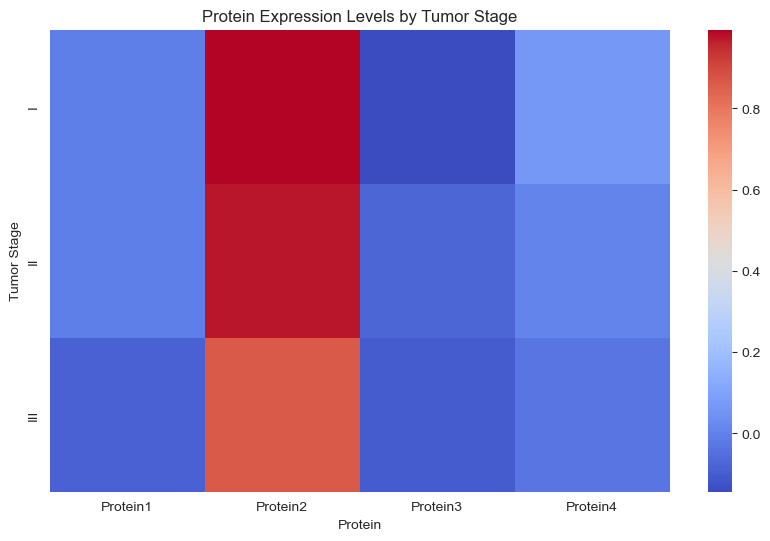

In [30]:
pivoted_data = brca.pivot_table(values=['Protein1', 'Protein2', 'Protein3', 'Protein4'], index='Tumour_Stage')

# create a heatmap of the protein expression levels by tumor stage
sns.heatmap(pivoted_data, cmap='coolwarm')

# set the title and labels for the plot
plt.title('Protein Expression Levels by Tumor Stage')
plt.xlabel('Protein')
plt.ylabel('Tumor Stage')

# display the plot
plt.show()

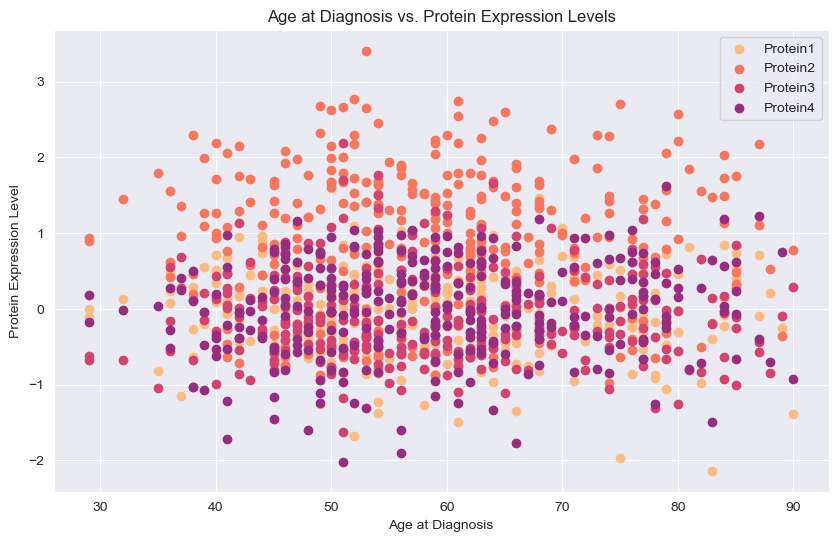

In [31]:
plt.scatter(brca['Age'], brca['Protein1'], label='Protein1')
plt.scatter(brca['Age'], brca['Protein2'], label='Protein2')
plt.scatter(brca['Age'], brca['Protein3'], label='Protein3')
plt.scatter(brca['Age'], brca['Protein4'], label='Protein4')

# set the title and labels for the plot
plt.title('Age at Diagnosis vs. Protein Expression Levels')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Protein Expression Level')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()

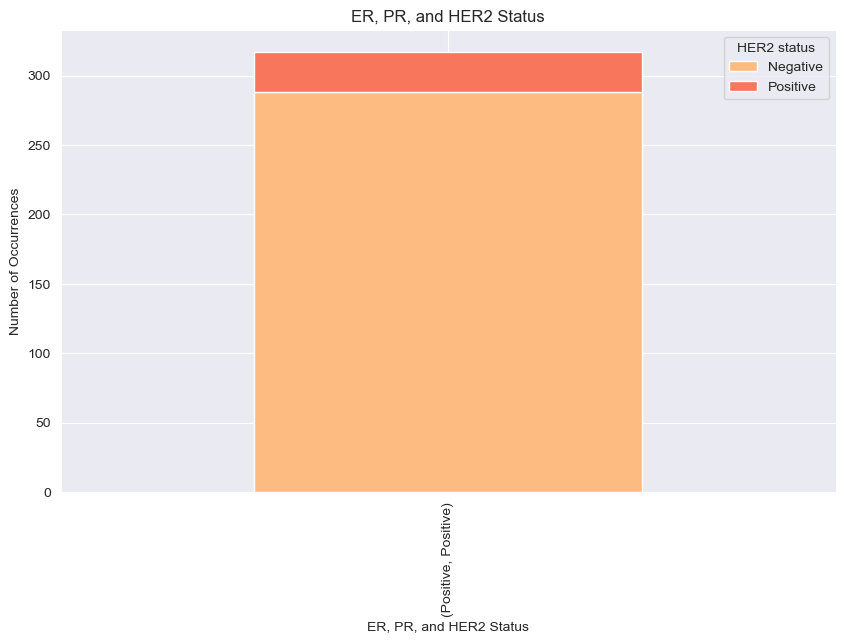

In [32]:
# group the data by ER, PR, and HER2 status and count the number of occurrences
status_counts = brca.groupby(['ER status', 'PR status', 'HER2 status']).size()

# convert the data to a pivot table and plot a stacked bar chart
status_counts.unstack().plot(kind='bar', stacked=True)

# set the title and labels for the plot
plt.title('ER, PR, and HER2 Status')
plt.xlabel('ER, PR, and HER2 Status')
plt.ylabel('Number of Occurrences')

# display the plot
plt.show()

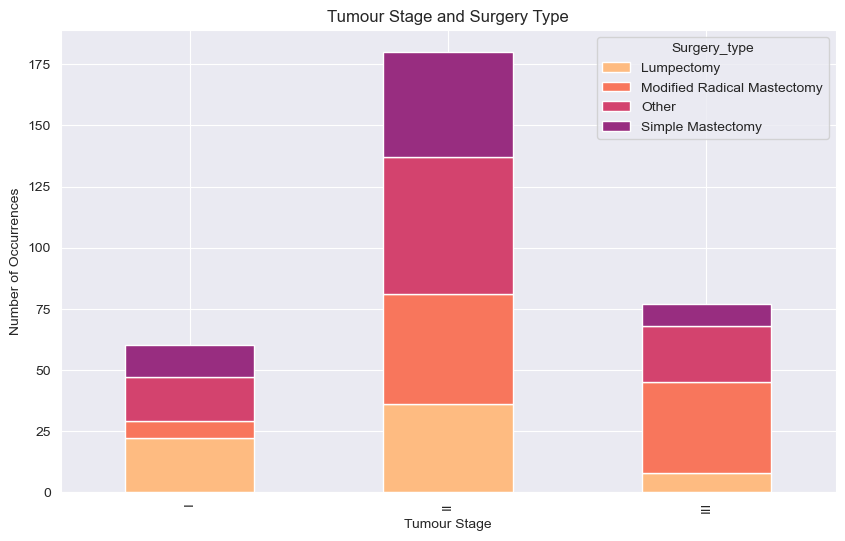

In [33]:
# group the data by tumour stage and surgery type and count the number of occurrences
surgery_counts = brca.groupby(['Tumour_Stage', 'Surgery_type']).size()

# convert the data to a pivot table and plot a stacked bar chart
surgery_counts.unstack().plot(kind='bar', stacked=True)

# set the title and labels for the plot
plt.title('Tumour Stage and Surgery Type')
plt.xlabel('Tumour Stage')
plt.ylabel('Number of Occurrences')

# display the plot
plt.show()

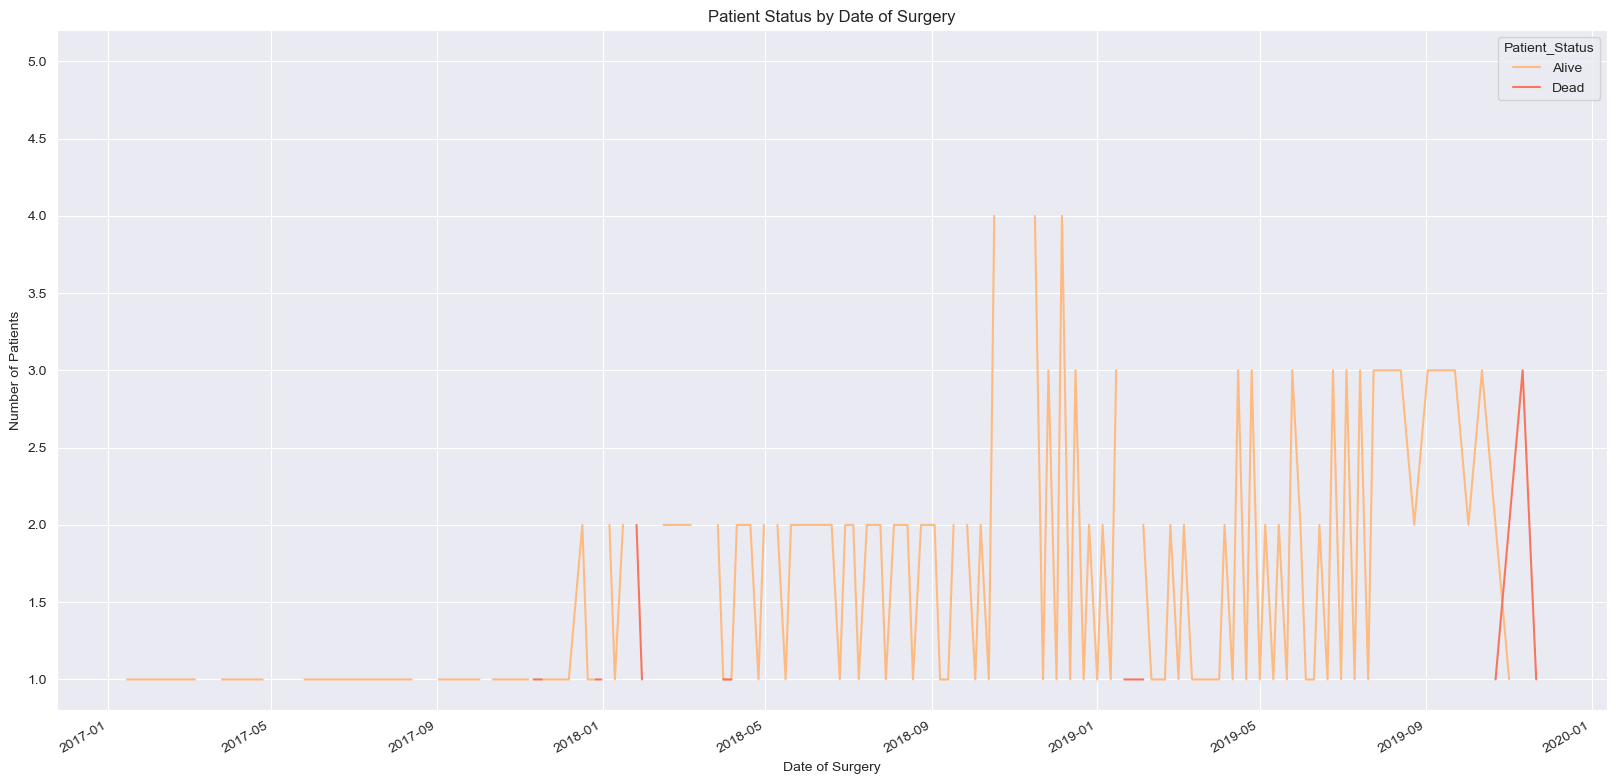

In [34]:
# Convert the date columns to datetime format
brca['Date_of_Surgery'] = pd.to_datetime(brca['Date_of_Surgery'])
brca['Date_of_Last_Visit'] = pd.to_datetime(brca['Date_of_Last_Visit'])

# Group the data by date of surgery and patient status
grouped_data = brca.groupby(['Date_of_Surgery', 'Patient_Status']).size().reset_index(name='count')

# Pivot the data to create a time series plot
pivot_data = grouped_data.pivot(index='Date_of_Surgery', columns='Patient_Status', values='count')

# Create a time series plot
pivot_data.plot(figsize=(20, 10))
plt.title('Patient Status by Date of Surgery')
plt.xlabel('Date of Surgery')
plt.ylabel('Number of Patients')
plt.show()

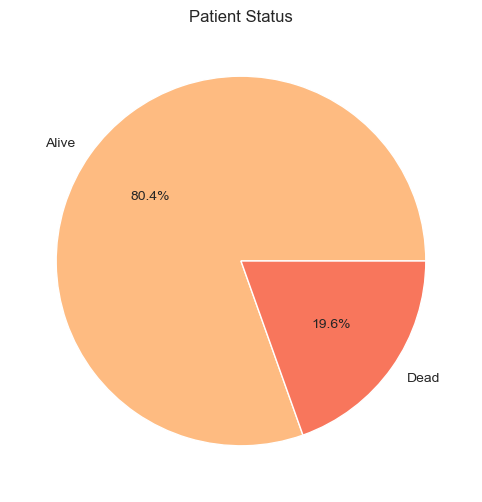

In [38]:
# Count the number of patients by patient status
status_counts = brca["Patient_Status"].value_counts()

# Create a pie chart
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title("Patient Status")
plt.show()


#### Hypothesis: Patients with higher expression levels of Protein1 are more likely to have a positive ER status than patients with lower expression levels. Null Hypothesis: There is no relationship between Protein1 expression levels and ER status. Alternative Hypothesis: There is a relationship between Protein1 expression levels and ER status.

In [49]:
from scipy.stats import chi2_contingency
# create contingency table
cont_table = pd.crosstab(brca['Protein1'], brca['ER status'])
print(cont_table)
# perform chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# print results
print('Chi-square statistic:', chi2)
print('P-value:', pval)
if pval < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

ER status  Positive
Protein1           
-2.1446           1
-1.9711           1
-1.6828           1
-1.4872           1
-1.3882           1
...             ...
 1.0352           1
 1.0674           1
 1.0902           1
 1.4704           1
 1.5936           1

[316 rows x 1 columns]
Chi-square statistic: 0.0
P-value: 1.0
Fail to reject null hypothesis


#### Hypothesis: Patients with a higher tumour stage are more likely to have a negative HER2 status than patients with a lower tumour stage. Null Hypothesis: There is no relationship between tumour stage and HER2 status. Alternative Hypothesis: There is a relationship between tumour stage and HER2 status.

In [50]:
# Create a contingency table of Tumour Stage and HER2 Status
contingency_table = pd.crosstab(brca['Tumour_Stage'], brca['HER2 status'])

# Print the contingency table
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('chi-squared statistic:', chi2)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

HER2 status   Negative  Positive
Tumour_Stage                    
I                   57         3
II                 167        13
III                 64        13
chi-squared statistic: 7.588378205978782
p-value: 0.02250114453171243
Reject null hypothesis


#### Hypothesis: Patients who undergo a modified radical mastectomy are more likely to have a positive patient status than patients who undergo other types of surgery. Null Hypothesis: There is no relationship between surgery type and patient status. Alternative Hypothesis: There is a relationship between surgery type and patient status.

In [52]:
# Create a contingency table of surgery type and patient status
contingency_table1 = pd.crosstab(brca['Surgery_type'], brca['Patient_Status'])

print(contingency_table1)

# Perform chi-squared test
chi2, pval, dof, expected = chi2_contingency(contingency_table1)

# Print the results
print("Chi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {pval}")
if pval < 0.05:
    print("There is a significant relationship between surgery type and patient status.")
else:
    print("There is no significant relationship between surgery type and patient status.")

Patient_Status               Alive  Dead
Surgery_type                            
Lumpectomy                      57     9
Modified Radical Mastectomy     72    17
Other                           73    24
Simple Mastectomy               53    12
Chi-squared test results:
Chi-squared statistic: 3.189522884338639
P-value: 0.363317326012316
There is no significant relationship between surgery type and patient status.
